<a href="https://colab.research.google.com/github/sujata533195/Clustering/blob/master/feature_selector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install feature_selector


In [0]:
from feature_selector import FeatureSelector

In [0]:
import numpy as np

In [0]:
import pandas as pd


In [15]:
pip install --upgrade numpy


     |████████████████████████████████| 20.1MB 1.4MB/s 
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
ERROR: plotnine 0.5.1 has requirement matplotlib>=3.0.0, but you'll have matplotlib 2.1.2 which is incompatible.
ERROR: plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.23.1 which is incompatible.
ERROR: mizani 0.5.4 has requirement pandas>=0.23.4, but you'll have pandas 0.23.1 which is incompatible.
ERROR: imbalanced-learn 0.4.3 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=0.25.0; python_version >= "3.0", but you'll have pandas 0.23.1 which is incompatible.
ERROR: feature-selector 1.0.0 has requirement numpy==1.14.5, but you'll have numpy 1.18.0 which is incompatible.
ERROR: fbprophet 0.5 has requirement pandas>=0.23.4, but you'll have pandas 0.23.1 which is incompatible.
ERROR: datascience 

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
data=pd.read_csv('/gdrive/My Drive/Colab Notebooks/super_hero_powers.csv')

In [8]:
data.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,...,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
x=data.loc[:,data.columns !='Web Creation']

In [10]:
x.shape

(667, 167)

In [0]:
y=data.loc[:,data.columns =='Web Creation']

In [13]:
y.shape

(667, 1)

In [0]:
fs=FeatureSelector(x,y)

In [16]:
fs.identify_missing(missing_threshold=0.6)

0 features with greater than 0.60 missing values.



In [17]:
fs.identify_missing(missing_threshold=0.2)

0 features with greater than 0.20 missing values.



In [18]:
fs.missing_stats.head(50)

,missing_fraction
hero_names,0.0
Natural Weapons,0.0
Enhanced Smell,0.0
Illusions,0.0
Thirstokinesis,0.0
Hair Manipulation,0.0
Illumination,0.0
Omnipotent,0.0
Cloaking,0.0
Changing Armor,0.0


In [0]:
missing_features=fs.ops['missing']

In [20]:
missing_features

[]

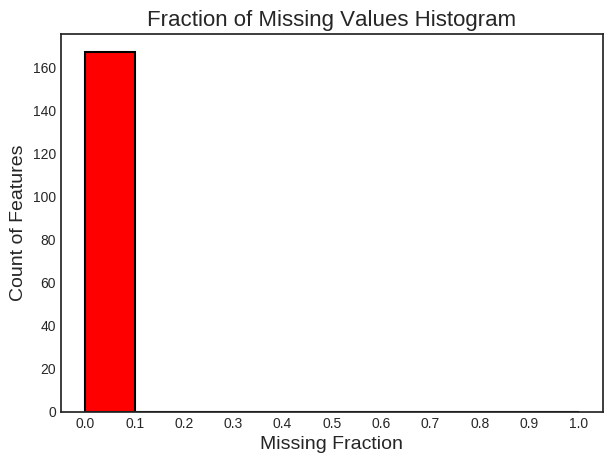

In [21]:
fs.plot_missing()

In [24]:
fs.identify_collinear(correlation_threshold=0.9,one_hot=True)

15 features with a correlation magnitude greater than 0.90.



TypeError: ignored

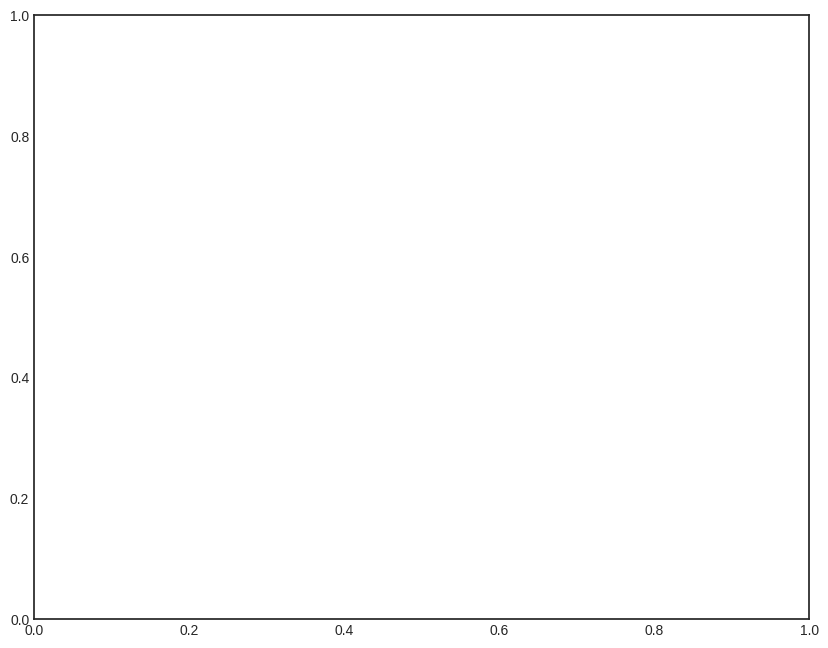

In [25]:
fs.plot_collinear()

In [0]:
collinear_features=fs.ops['collinear']

In [27]:
collinear_features

['Spatial Awareness',
 'Omniscient',
 'hero_names_Apocalypse',
 'hero_names_Ben 10',
 'hero_names_Cameron Hicks',
 'hero_names_Doctor Strange',
 'hero_names_Dr Manhattan',
 'hero_names_Electro',
 'hero_names_Flash II',
 'hero_names_Kang',
 'hero_names_Kool-Aid Man',
 'hero_names_Medusa',
 'hero_names_Phoenix',
 'hero_names_Sylar',
 'hero_names_Valerie Hart']

In [28]:
fs.record_collinear.head(5)

,drop_feature,corr_feature,corr_value
0,Spatial Awareness,Hyperkinesis,1.0
1,Omniscient,Omnipresent,1.0
2,hero_names_Apocalypse,Biokinesis,1.0
3,hero_names_Ben 10,Omnitrix,1.0
4,hero_names_Cameron Hicks,Hyperkinesis,1.0


In [29]:
fs.identify_zero_importance(task='classification',eval_metric='auc',n_iterations=10,early_stopping=True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[102]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[91]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[29]	valid_0's auc: 0.996599
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[17]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[51]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[24]	valid_0's auc: 1


In [0]:
zero_importance_features=fs.ops['zero_importance']

In [31]:
zero_importance_features

['hero_names_Minna Murray',
 'hero_names_Meltdown',
 'hero_names_Mephisto',
 'hero_names_Luke Skywalker',
 'hero_names_Luke Campbell',
 'hero_names_Mera',
 'hero_names_Luke Cage',
 'hero_names_Misfit',
 'hero_names_Mimic',
 'hero_names_Micro Lad',
 'hero_names_Metallo',
 'hero_names_Metamorpho',
 'hero_names_Luna',
 'hero_names_Metron',
 'hero_names_Micah Sanders',
 'hero_names_Lord Voldemort',
 'hero_names_Michelangelo',
 'hero_names_Medusa',
 'hero_names_Maxima',
 'hero_names_Maya Herrera',
 'hero_names_Martian Manhunter',
 'hero_names_Magus',
 'hero_names_Man-Bat',
 'hero_names_Miss Martian',
 'hero_names_Man-Wolf',
 'hero_names_Magog',
 'hero_names_Magneto',
 'hero_names_Mandarin',
 'hero_names_Mantis',
 'hero_names_Longshot',
 'hero_names_Marvel Girl',
 'hero_names_Man of Miracles',
 'hero_names_Machine Man',
 'hero_names_Mach-IV',
 'hero_names_Master Brood',
 'hero_names_MODOK',
 'hero_names_Master Chief',
 'hero_names_Lyja',
 'hero_names_Match',
 'hero_names_Matt Parkman',
 'her

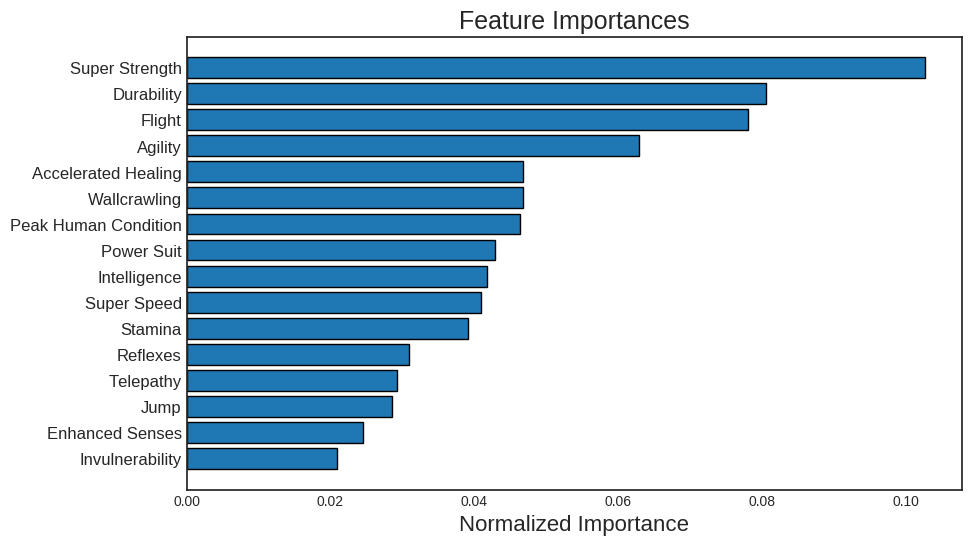

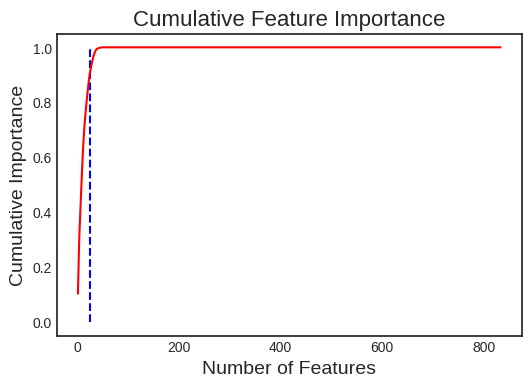

24 features required for 0.90 of cumulative importance


In [32]:
fs.plot_feature_importances(threshold=0.9,plot_n=16)

In [33]:
fs.identify_low_importance(cumulative_importance=0.9)

23 features required for cumulative importance of 0.90 after one hot encoding.
810 features do not contribute to cumulative importance of 0.90.



In [34]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,Super Strength,57.5,0.102679,0.102679
1,Durability,45.1,0.080536,0.183214
2,Flight,43.7,0.078036,0.261250
3,Agility,35.2,0.062857,0.324107
4,Accelerated Healing,26.2,0.046786,0.370893
5,Wallcrawling,26.2,0.046786,0.417679
6,Peak Human Condition,26.0,0.046429,0.464107
7,Power Suit,24.0,0.042857,0.506964
8,Intelligence,23.4,0.041786,0.548750
9,Super Speed,22.9,0.040893,0.589643


In [35]:
fs.identify_single_unique()

0 features with a single unique value.



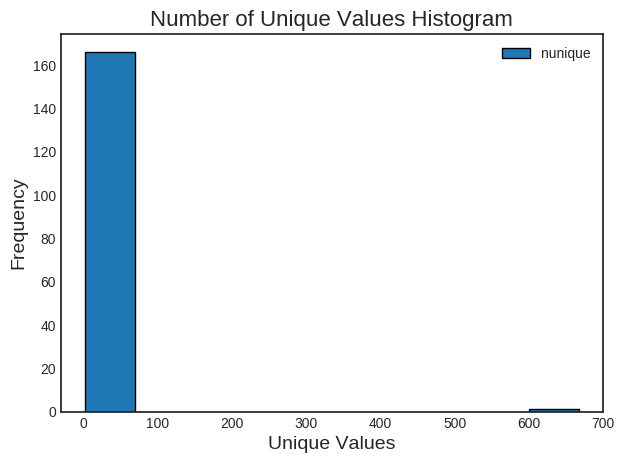

In [36]:
fs.plot_unique()

In [37]:
fs.identify_all(selection_params={'missing_threshold':0.6,
                                  'correlation_threshold':0.9,
                                  'task':'classification',
                                  'eval_metric':'auc',
                                  'cumulative_importance':0.9})

0 features with greater than 0.60 missing values.

0 features with a single unique value.

2 features with a correlation magnitude greater than 0.90.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[58]	valid_0's auc: 0.98
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[102]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[13]	valid_0's auc: 0.99
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[19]	valid_0's auc: 0.993197
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[116]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[37]	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, b

In [38]:
train_removed_all=fs.remove(methods='all',keep_one_hot=False)

['missing', 'collinear', 'zero_importance', 'low_importance', 'single_unique'] methods have been run

Removed 809 features including one-hot features.


In [39]:
train_removed_all.head(20)

,hero_names,Agility,Accelerated Healing,Durability,Stealth,Flight,Danger Sense,Marksmanship,Intelligence,Super Strength,Telepathy,Energy Blasts,Stamina,Super Speed,Animal Oriented Powers,Enhanced Senses,Jump,Peak Human Condition,Reflexes,Invulnerability,Hypnokinesis,Power Suit,Illusions,Toxin and Disease Resistance,Wallcrawling
0,3-D Man,True,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,False,False,True,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,True,True,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False
5,Abraxas,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
6,Absorbing Man,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
7,Adam Monroe,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,Adam Strange,False,False,True,True,True,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
9,Agent Bob,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
train_removed_all.shape

(667, 25)